In [ ]:
! python downloader.py

Picked the following clases: 
Count: 20
['cell', 'person', 'plant', 'food', 'pay-phone', 'motorcycling', 'computer', 'hawk', 'boa', 'kangaroo', 'cow', 'jellyfish', 'bear', 'camel', 'acropolis', 'alarm clock', 'aircraft', 'shield', 'bag', 'skeleton key']
Multiprocessing workers: 50
  0% 0/20 [00:00<?, ?it/s]
Scraping stats:
STATS For class is_flickr:
 tried 209.0 urls with 176.0 successes
83.79629629629629% success rate for is_flickr urls 
0.02160504904191459 seconds spent per is_flickr successful image download
STATS For class not_flickr:
 tried 0.0 urls with 0.0 successes
STATS For class all:
 tried 226.0 urls with 191.0 successes
84.51327433628319% success rate for all urls 
0.020099266930823607 seconds spent per all successful image download

Scraping stats:
STATS For class is_flickr:
 tried 476.0 urls with 407.0 successes
85.71428571428571% success rate for is_flickr urls 
0.01820188959018845 seconds spent per is_flickr successful image download
STATS For class not_flickr:
 tried 0

In [ ]:
!python drive/My\ Drive/Colab\ Notebooks/image_net_preprocessing.py

List of folder names: ['kangaroo', 'camel', 'person', 'jellyfish', 'bear', 'cow', 'aircraft', 'shield', 'computer', 'motorcycling', 'hawk', 'acropolis', 'pay-phone', 'food', 'boa', 'bag', 'cell', 'skeleton key', 'alarm clock', 'plant']
Finished processing kangaroo
Finished processing camel
Finished processing person
Finished processing jellyfish
Finished processing bear
Finished processing cow
Finished processing aircraft
Finished processing shield
Finished processing computer
Finished processing motorcycling
Finished processing hawk
Finished processing acropolis
Finished processing pay-phone
Finished processing food
Finished processing boa
Finished processing bag
Finished processing cell
Finished processing skeleton key
Finished processing alarm clock
Finished processing plant
Runtime: 4662.663310050964s


In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import gc
import pickle
import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train_data_paths_and_labels.csv')
test_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/test_data_paths_and_labels.csv')

# x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=13)

x_train, y_train = (train_data['Path'], train_data['Label'])
x_test, y_test = (test_data['Path'], test_data['Label'])

x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

x_test = x_test.to_numpy()
y_test = y_test.to_numpy()


x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=13)

del train_data
del test_data
gc.collect()

Using TensorFlow backend.


22

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['cell', 'person', 'plant', 'food', 'pay-phone', 'motorcycling', 'computer', 'hawk', 'boa', 'kangaroo', 'cow', 'jellyfish', 'bear', 'camel', 'acropolis', 'alarm clock', 'aircraft', 'shield', 'bag', 'skeleton key'])
y_train=le.transform(y_train)
y_val=le.transform(y_val)
y_test=le.transform(y_test)

In [ ]:
k=0
train_images = []
for img in x_train:
    train_images.append(img_to_array(load_img(img)))
    k+=1
    print(k)

train_images = np.array(train_images)
# pickle.dump((train_images,y_train), open('/content/drive/My Drive/Colab Notebooks/train_pickle.p', 'wb'))

del train_images
gc.collect()

0

In [ ]:
k=0
val_images = []
for img in x_val:
    val_images.append(img_to_array(load_img(img)))
    k+=1
    print(k)

val_images = np.array(val_images)
# pickle.dump((val_images,y_val), open('/content/drive/My Drive/Colab Notebooks/val_pickle.p', 'wb'))

del val_images
gc.collect()

In [ ]:
k=0
test_images = []
for img in x_test:
    test_images.append(img_to_array(load_img(img)))
    k+=1
    print(k)
   
test_images = np.array(test_images)
# pickle.dump((test_images,y_test), open('/content/drive/My Drive/Colab Notebooks/test_pickle.p', 'wb'))

del test_images
gc.collect()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


238

In [3]:
import pickle
x_train, y_train = pickle.load(open('/content/drive/My Drive/train_pickle.p', 'rb'))
x_val, y_val = pickle.load(open('/content/drive/My Drive/val_pickle.p', 'rb'))

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(6400, 224, 224, 3)
(6400,)
(1600, 224, 224, 3)
(1600,)


In [5]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
from keras import regularizers
import pickle

Using TensorFlow backend.


In [6]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
# reduce learning rate by a factor of 10 of val_loss 
# does not reduce for 3 epochs
c1 = ReduceLROnPlateau(monitor='val_loss',factor=0.9,patience=5,min_lr=0.0000001)
# Early stop training if val_acc falls or stays flat for 7 epochs
c2 = EarlyStopping(monitor='val_loss',patience=8)

In [28]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(20, activation='softmax'))

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
batch_normalization_63 (Batc (None, 224, 224, 32)      128       
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 224, 224, 32)      9248      
_________________________________________________________________
batch_normalization_64 (Batc (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
dropout_44 (Dropout)         (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 112, 112, 64)     

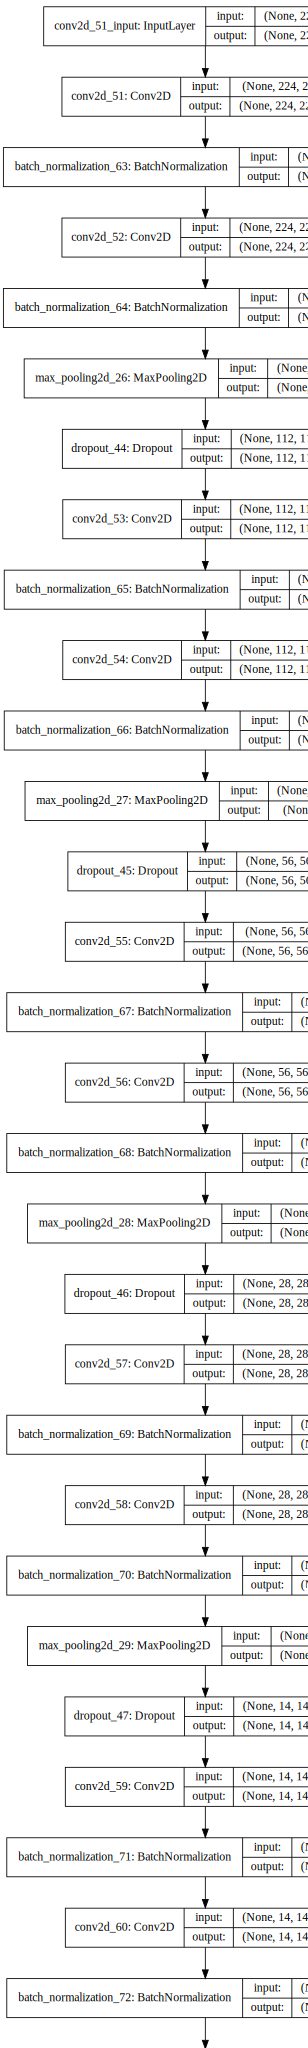

In [29]:
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
import tensorflow as tf
import pydot
# import graphviz
import pydotplus
from IPython.display import SVG

tf.keras.utils.plot_model(model, to_file='model.png')
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True, rankdir='TB').create(prog='dot', format='svg'))

In [30]:
history = model.fit(x_train,y_train, batch_size=128,epochs = 50, 
                              validation_data = (x_val, y_val), verbose=1, callbacks = [c1,c2])

Train on 6400 samples, validate on 1600 samples
Epoch 1/50
6400/6400 [==============================] - 87s 14ms/step - loss: 3.4641 - accuracy: 0.1200 - val_loss: 22.3132 - val_accuracy: 0.0831
Epoch 2/50
6400/6400 [==============================] - 84s 13ms/step - loss: 2.8052 - accuracy: 0.1975 - val_loss: 5.7449 - val_accuracy: 0.1119
Epoch 3/50
6400/6400 [==============================] - 84s 13ms/step - loss: 2.4885 - accuracy: 0.2614 - val_loss: 5.7280 - val_accuracy: 0.1044
Epoch 4/50
6400/6400 [==============================] - 84s 13ms/step - loss: 2.3573 - accuracy: 0.3017 - val_loss: 4.4146 - val_accuracy: 0.1363
Epoch 5/50
6400/6400 [==============================] - 84s 13ms/step - loss: 2.2106 - accuracy: 0.3389 - val_loss: 3.4513 - val_accuracy: 0.1544
Epoch 6/50
6400/6400 [==============================] - 84s 13ms/step - loss: 2.1093 - accuracy: 0.3630 - val_loss: 3.2119 - val_accuracy: 0.1706
Epoch 7/50
6400/6400 [==============================] - 84s 13ms/step - los

In [ ]:
# import gc
# del x_train
# gc.collect()

In [31]:
model.save_weights('/content/drive/My Drive/Colab Notebooks/Part3_model_1.h5')

In [ ]:
# model = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/Part3_model.h5')

In [32]:
score_val = model.evaluate(x_val, y_val, verbose=0)

print('Validation loss:', score_val[0])
print('Validation accuracy:', score_val[1])

Validation loss: 1.7463324427604676
Validation accuracy: 0.5575000047683716


In [33]:
x_test, y_test = pickle.load(open('/content/drive/My Drive/test_pickle.p', 'rb'))

In [34]:
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import accuracy_score

test_predictions = model.predict_classes(x_test)

cm = confusion_matrix(y_test, test_predictions)
score = accuracy_score(y_test, test_predictions)
print(cm)

[[75  1  0  0  2  1  8  1  2  1  0  0  0  1  0  3  1  0  3  1]
 [ 4 57  3  0  1  0  0  3  2  0  0  1  2  0  3  3 10  0  3  8]
 [ 0  3 38  1  0  1  1  3  8  0  5  1  3  0  0 12 11  2  5  6]
 [ 0  0  4 39  2  6  3  3  8  0  2  1  1  3  2  7  8  1  7  3]
 [ 0  1  0  0 54  2 11  2  0  3  0  2  2 12  0  1  5  1  3  1]
 [ 0  1  1  0  4 49  9  1  1  0  2  2  0 11  1  1  8  3  3  3]
 [ 2  1  0  0  1  6 48  0  0  7  0  7  0 16  1  1  7  0  1  2]
 [ 0  0  2  1  4  3  1 64  0  0  4  0  4  2  0  0  3  7  3  2]
 [ 3  5  3  1  0  0  2  0 43  1  1  1  1  0  0 19 10  0  7  3]
 [ 0  2  0  1  2  1  6  0  1 68  0  1  1  4  1  1  8  0  3  0]
 [ 0  0  3  0  2  5  7  1  2  0 60  6  0  2  0  0  3  3  4  2]
 [ 1  0  0  0  4 12  5  1  1  1  0 49  1  7  0  0  6  6  3  3]
 [ 0  0  3  0  3  0  2  5  0  0  1  1 75  2  0  1  5  2  0  0]
 [ 2  0  0  0  9  5 17  0  0  6  0  0  1 54  1  1  2  2  0  0]
 [ 0  6  0  0  0  1  0  0  1  0  0  1  0  0 80  1  1  1  6  2]
 [ 2  2  2  4  1  0  1  0 12  1  1  0  0  1  1 62  5  0

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Test Accuracy Score: 0.5635')

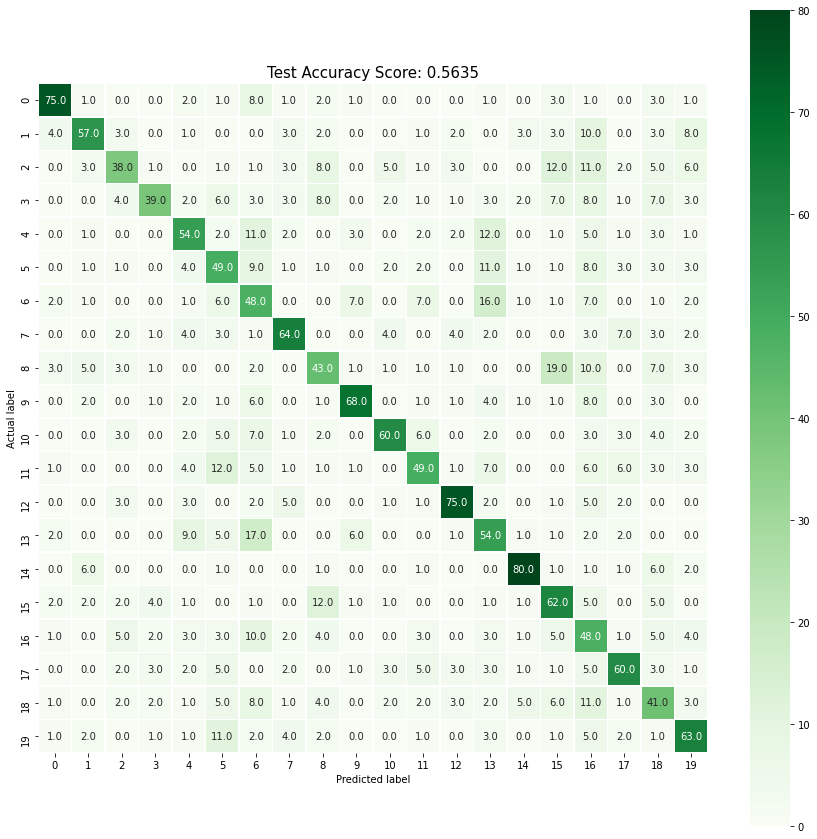

In [35]:
import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Greens')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Test Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

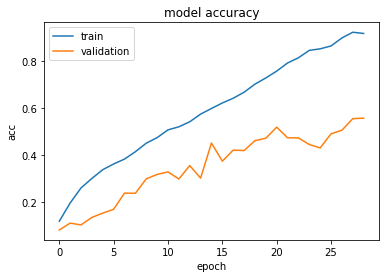

In [36]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')

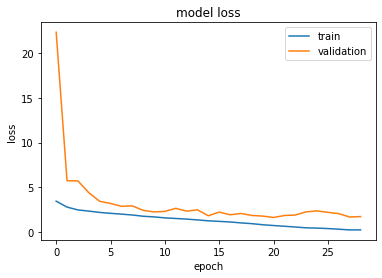

In [37]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')